### Statistical Plots
Created by Alanah Cardenas-O'Toole <br>
Summer 2025 <br>
Latest update: 08/07/2025 <br>
Email alanahco@umich.edu <br>
Walkthrough of how to use functions from Swarm_Stats.py

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta


# Statistical codes
from Swarm_Stats import states_report_swarm, LSS_plot_Swarm, map_hist_panel,
from Swarm_Stats import plot_hist_quad_maps, Liemohn_Skill_Scores
from Swarm_Stats import decision_table_sat, style_df_table, HMFC_percent_panel, HMFC_percent_figure
from Swarm_Stats import style_LSS_table, LSS_table_sat, one_model_LSS_plot_Swarm


#### Getting dataframes that include the basic state and H, M, F, C
Swarm_stats.states_report_swarm
This code requires that both NIMO and PyIRI daily files have been created <br>
and returns 3 dataframes <br>
that will be used for future statistics <br>
Note: if you just want H, M, F ,C for one model, <br>
state_check(obs_type, mod_type, state='eia') is useful
<br>
Requred Parameters <blockquote>
date_range : pandas daterange <blockquote>
    Date range of desired states files </blockquote>
daily_dir : str <blockquote>
    directory of daily files </blockquote> </blockquote>
<br>
Key Word Arguments <blockquote>
typ: str <blockquote>
    desired type to check against <br>
    for state orientations <br>
    'eia'(default), 'peak', 'flat', 'trough' <br>
    for direction orientations <br>
    'north', 'south', 'neither' </blockquote>
NIMO_alt: str <blockquote>
    specifies which altitude to use <br>
    'swarm'(default),'hmf2','100' </blockquote> </blockquote>
<br>
Returns <blockquote>
NiSw : DataFrame <blockquote>
    NIMO states, directions, and types (original full name) <br>
    also includes longitude, local times, and sat list </blockquote>
Sw : DataFrame <blockquote>
    Swarm States, direction, and types <br>
    also includes longitude, local times, and sat list </blockquote>
Py : DataFrame <blockquote>
    PyIRI states, directions, and types <br>
    also includes longitude, local times, and sat list </blockquote>

In [2]:
date_range = pd.date_range(start='2020-04-01',  end='2020-04-30')
daily_files = '~/Type_Files/Daily'
NiSw, Sw, PyI = states_report_swarm(date_range, daily_files, typ='eia')
print(NiSw) # Nimo Swarm comparison 

     state direction                   type   GLon         LT Sat skill
0     peak     north             peak_north  -40.0  21.950833   A     M
1     peak     south             peak_south  128.0   9.901974   A     C
2     peak     north             peak_north  -64.0  21.903889   A     C
3     peak   neither                   peak  104.0   9.897939   A     M
4      eia     south  eia_saddle_peak_south  -88.0  21.890833   A     H
...    ...       ...                    ...    ...        ...  ..   ...
2735   eia     north  eia_saddle_peak_north  160.0   7.292343   C     F
2736  peak   neither                   peak  -32.0  19.345556   C     M
2737   eia     north  eia_saddle_peak_north  136.0   7.284213   C     F
2738  peak     north             peak_north  -56.0  19.299444   C     M
2739  peak   neither                   peak  112.0   7.281541   C     C

[2740 rows x 7 columns]


#### Creating  Liemohn Skill Score plots
Swarm_Stats.LSS_plot_Swarm <br>
Created using Liemohn Skill Scores 1-4 from <br>
"Leaving Heidke behind: Defining an independent reference model <br>
for event detection skill scores" Liemohn et al. (in preparation 2025) <br>
This requires 2 models for compasion becuase LSS is valuable as a comparison tool. <br>
If you only want 1, then use Swarm_Stats.one_model_LSS_plot_Swarm <br>
NOTE: LSS can range outside of +/-1 <br>
<br>
Plot LSS vs CSI or PC 4 panels (one for each LSS)
Required Parameters <blockquote>
model1 : dataframe <blockquote>
    first model dataframe built by states_report_swarm </blockquote>
model2 : dataframe <blockquote>
    second model dataframe built by states_report_swarm </blockquote>
eia_type : str <blockquote>
    desired eia type for fig title </blockquote>
date_range : datetime range <blockquote>
    For plotting title purposes </blockquote>
</blockquote> <br>
Key Word Arguments <blockquote>
model1_name : str kwarg <blockquote>
    first model name for labelling purposes </blockquote>
model2_name : str kwarg <blockquote>
    second model name for labelling purposes </blockquote>
PorC : str kwarg <blockquote>
    Percent correct or Critical success index for x axes </blockquote>
DayNight : bool kwarg <blockquote>
    True (default) if panels should have separate markers for day and night </blockquote>
    otherwise (false) all are plotted together </blockquote>
LT_range : list kwarg <blockquote>
    Range of day night local time, Default is 7 LT to 19 LT for day and <br>
    19 LT to 7 LT for Night </blockquote> 
coin : bool kwarg <blockquote> 
    If True, coin LSS will be plotted for comparison (default) <br>
    if false, coin LSS will not be plotted</blockquote> </blockquote> 
    <br>
Returns <blockquote>
    fig : figure handle <blockquote>
        4 panel figure that includes LSS for the 2 models <br>
        and a coin toss if coin </blockquote> </blockquote> 

Note: Since we care about Correct Negatives, <br>
Percent Correct is more useful than Critical Success Index <blockquote>
PC = (H + C)/T <br>
CSI = H/(H + M + F) <blockquote>
according to Liemohn et al. pg 8 </blockquote> </blockquote>

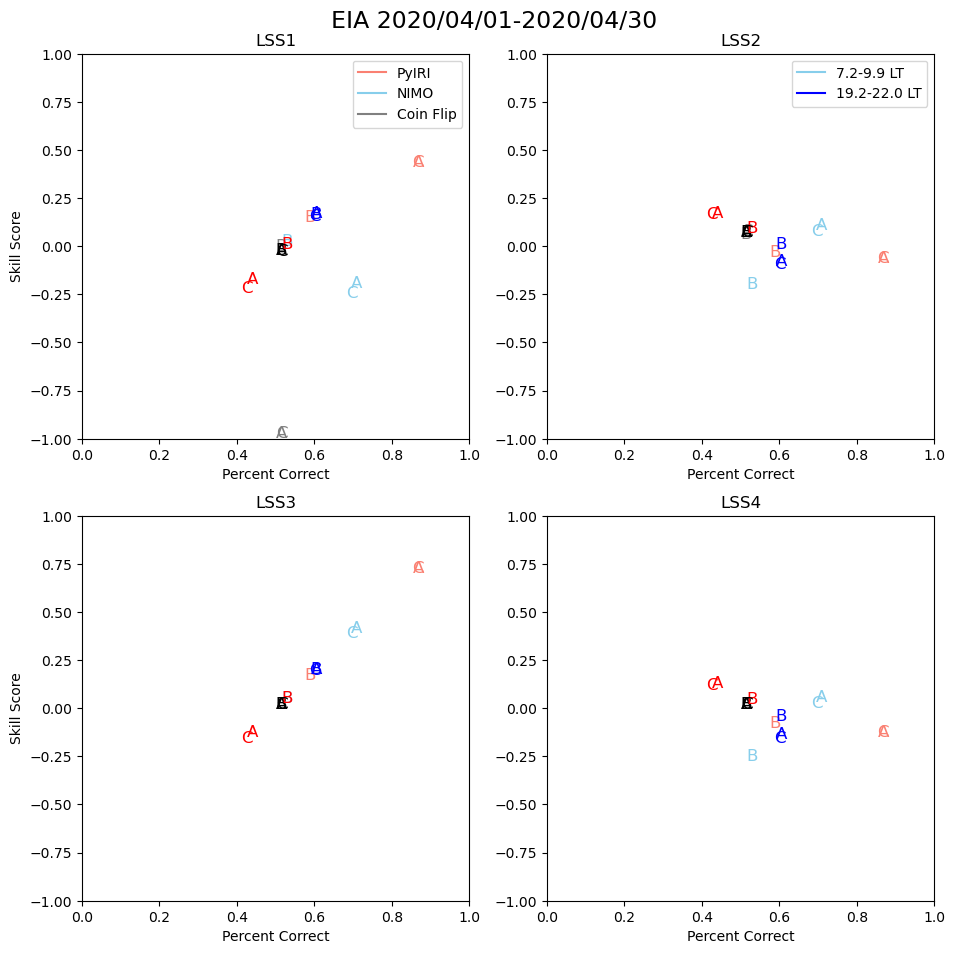

In [3]:
fig = LSS_plot_Swarm(NiSw, PyI, 'EIA', date_range, model1_name='NIMO', model2_name='PyIRI', PorC='PC', coin=True)

#### Creating  Liemohn Skill Score plots continued
Swarm_Stats.one_model_LSS_plot_Swarm <br>
Created using Liemohn Skill Scores 1-4 from <br>
"Leaving Heidke behind: Defining an independent reference model <br>
for event detection skill scores" Liemohn et al. (in preparation 2025) <br>
If you want to compare 2 models, then use Swarm_Stats.LSS_plot_Swarm
<br>
Plot LSS vs CSI or PC 4 panels (one for each LSS)
Required Parameters <blockquote>
model1 : dataframe <blockquote>
    first model dataframe built by states_report_swarm </blockquote>
eia_type : str <blockquote>
    desired eia type for fig title </blockquote>
date_range : datetime range <blockquote>
    For plotting title purposes </blockquote>
</blockquote> <br>
Key Word Arguments <blockquote>
model_name : str kwarg <blockquote>
    first model name for labelling purposes </blockquote>
PorC : str kwarg <blockquote>
    Percent correct or Critical success index for x axes </blockquote>
DayNight : bool kwarg <blockquote>
    True (default) if panels should have separate markers for day and night </blockquote>
    otherwise (false) all are plotted together </blockquote>
LT_range : list kwarg <blockquote>
    Range of day night local time, Default is 7 LT to 19 LT for day and <br>
    19 LT to 7 LT for Night </blockquote> 
coin : bool kwarg <blockquote> 
    If True, coin LSS will be plotted for comparison (default) <br>
    if false, coin LSS will not be plotted</blockquote> </blockquote> 
    <br>
Returns <blockquote>
    fig : figure handle <blockquote>
        4 panel figure that includes LSS for the 2 models <br>
        and a coin toss if coin </blockquote> </blockquote> 
Note: Warning will be printed if coin is specified as False

/Users/aotoole/Documents/Python_Code/EIA_Update/Swarm_Stats.py:575: UserWarning: Warning: Coin is False! LSS is a comparison tool!
  warnings.warn("Warning: Coin is False! LSS is a comparison tool!")


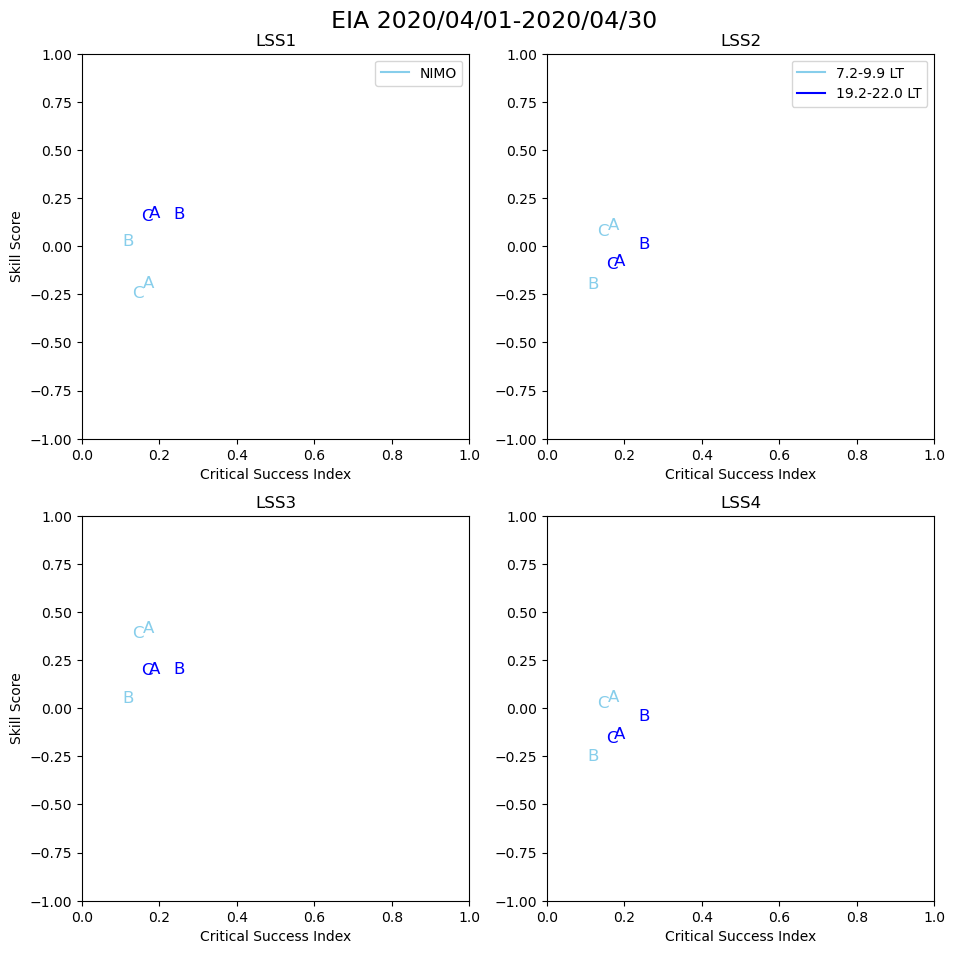

In [4]:
fig = one_model_LSS_plot_Swarm(NiSw, 'EIA', date_range, model_name='NIMO', PorC='CSI', DayNight=True,
                               LT_range=[7, 19], coin=False)

#### Plotting Histogram Maps
Function Swarm_Stats.plot_hist_quad_maps <br>
plot histogram maps on a 4 panel figure for each score: Hit, Miss, <br>
False positive, and Correct Negative <br>
This function calls <br>
Swarm_Stats.map_hist_panel(ax, model, bin_lons=37, DayNight=True, LT_range=[7, 19]) <br>
Which will make just 1 panel <br>
<br>
Required Parameters <blockquote>
model_states : dataframe <blockquote>
    dataframe of model data including skill and local times <br>
    built by states_report_swarm </blockquote>
sat : str <blockquote>
    swarm satellite 'A', 'B', or 'C' </blockquote>
eia_type : str <blockquote>
    eia state e.g. EIA, Peak, etc. <br>
    depending on what is considered a hit </blockquote>
date_range : pandas daterange <blockquote>
    range of dates for title purposes </blockquote> </blockquote>

Key Word Arguments <blockquote>
bin_lons : int kwarg <blockquote>
    number of bins between -180 and 180 deg geo lon <br>
    np.linspace(-180, 180, bin_lons) <br>
    default 37 </blockquote>
model_name : str kwarg <blockquote>
    name of model for title purposes <br>
    default 'Model' </blockquote>
fosi : int kwarg <blockquote>
    font size for plot <br>
    default 16 </blockquote>
hist_ylim : list kwarg <blockquote>
    y range (counts) for hist plot <br>
    default [0,15] </blockquote>
LT_range : list kwarg <blockquote>
    Range of day night local time <br>
    Default is 7 LT to 19 LT for day and <br>
    19 LT to 7 LT for Night </blockquote> </blockquote>
    
Returns <blockquote>
fig : figure handle <blockquote>
    fig with 4 panels of hist maps </blockquote> </blockquote>

Note: A side thought is to have only 2 panels: <br>
one with HIT and total in state (H + M) <br>
and another with Correct Negatives and total out of state(C + F)

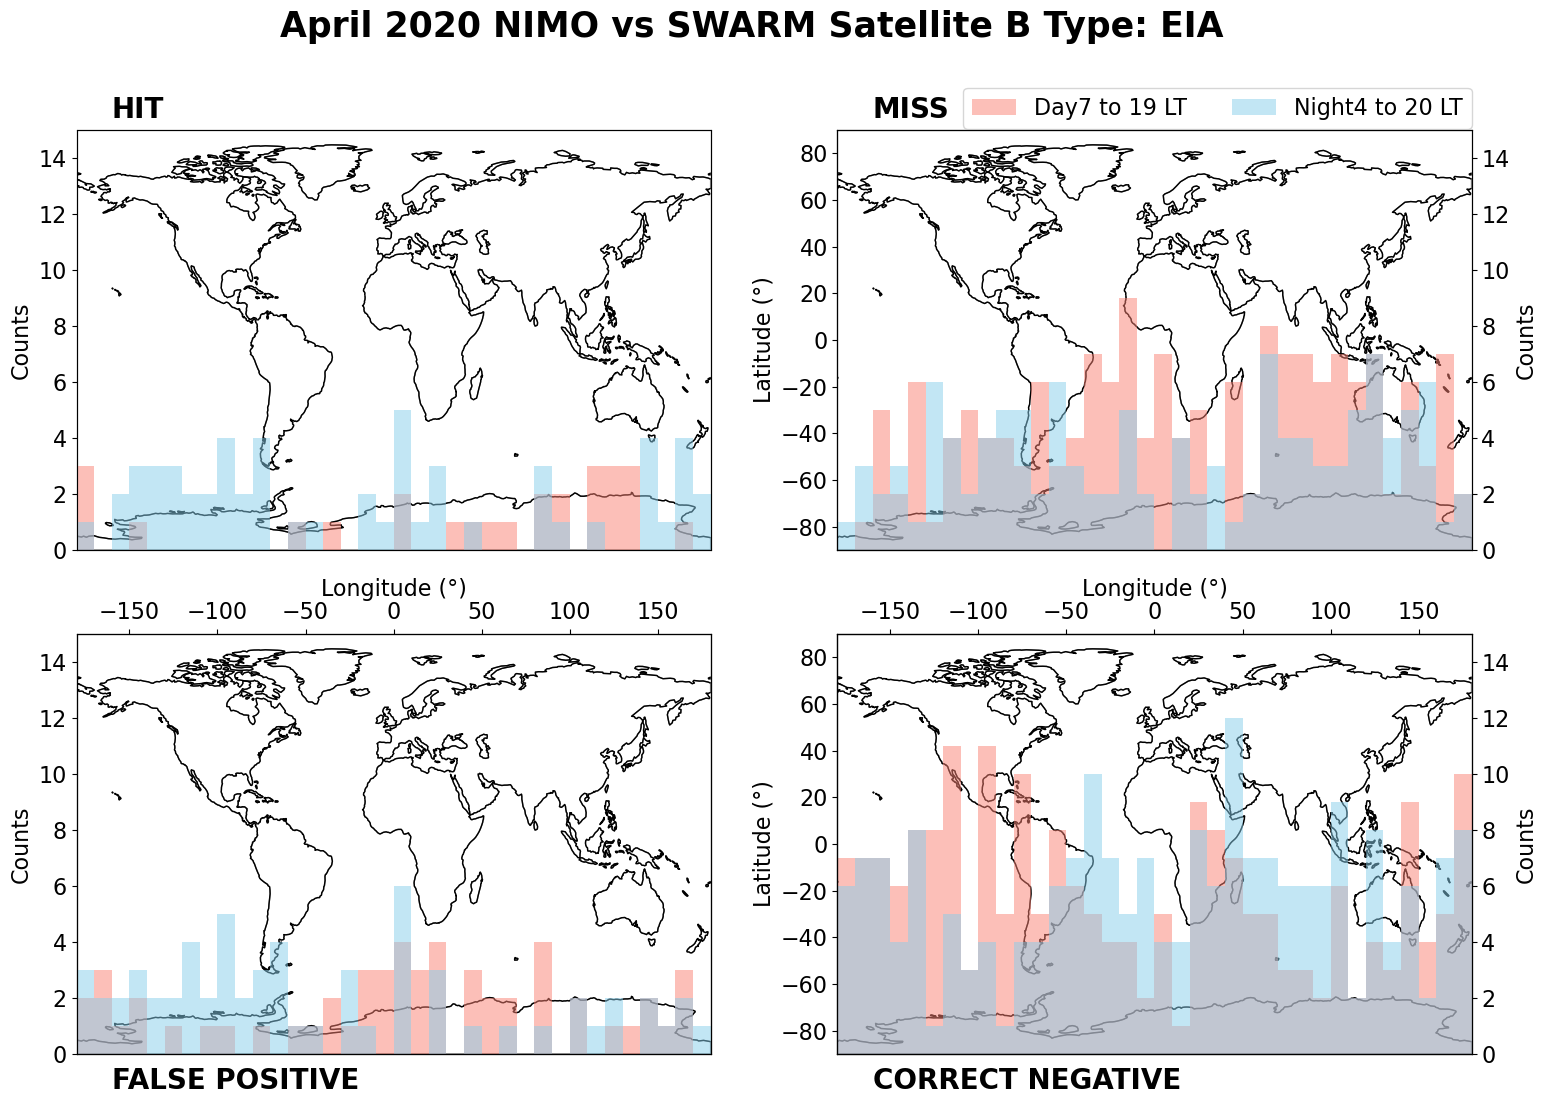

In [5]:
fig = plot_hist_quad_maps(NiSw, 'B', 'eia', date_range, bin_lons=37, model_name='NIMO', fosi=16)

### Making Decision Tables
#### Swarm_Stats.decision_table_sat
Takes in dataframe created by Swarm_Stats.states_report_swarm <br>
Neat decision table summing up the hits, misses, <br>
correct negatives, and false positives per satellite <br>
<br>
Required  Parameters <blockquote>
states: dataframe <blockquote>
    dataframe of model data including skill and local times <br>
    built by states_report_swarm </blockquote>
eia_type : str <blockquote>
    eia state e.g. EIA, Peak, etc. depending on what is considered a hit </blockquote>
</blockquote>
Key Word Arguments <blockquote>
sats : list of strings kwarg <blockquote>
    swarm satellites 'A', 'B', and 'C' as default <br>
    can specify just 1 or 2 </blockquote>
model_name : str kwarg <blockquote>
    Model name for decision table label <br>
    default 'Model' </blockquote> </blockquote>
Returns <blockquote>
df : dataframe <blockquote>
    dataframe in table format separated by satellite <br>
    and event state (state, non-state) <br>
    index using <br>
    df.loc[(f'Swarm {satellite}', eia_type), (model_name, eia_type)] </blockquote> </blockquote>

#### Swarm_Stats.style_df_table
This function styles the table created by Swarm_Stats.decision_table_sat <br>
This will only be for all satellites because I spent too much time <br>
Trying to figure out how to make it more general. <br>
The issue is from 941 where I specify the colors <br>
<br>
Required Parameters: <blockquote>
df_table : dataframe <blockquote>
    dataframe created by decision_table_sat </blockquote>
eia_type : str <blockquote>
    string designating which eia type is being reported </blockquote>
</blockquote>
Returns <blockquote>
Styled dataframe with colors indicating successes and failures <br>
and table spearators by satelltie </blockquote>


In [6]:
df_table = decision_table_sat(NiSw)
df_table

Model        
                   eia Non-eia
Swarm A eia       65.0   184.0
        Non-eia  142.0   522.0
Swarm B eia       83.0   287.0
        Non-eia  118.0   416.0
Swarm C eia       56.0   191.0
        Non-eia  146.0   530.0

In [7]:
styled_table = style_df_table(df_table, 'eia')
styled_table

### Making Liemohn Skill Score Tables
#### Swarm_Stats.LSS_table_sat
Neat table including the Liemohn Skill Scores 1-4 separated by satellite <br>
<br>

Required Parameters <blockquote>

model1: dataframe <blockquote>
    dataframe of 1st model data including skill and local times
    built by states_report_swarm </blockquote>
model2 : dataframe <blockquote>
    dataframe of 2nd model data including skill and local times
    built by states_report_swarm </blockquote> </blockquote>
<br>
Key Word Arugments <blockquote>
model1_name : str kwarg <blockquote>
    string of name of model1 </blockquote>
model2_name : str kwarg <blockquote>
    string of name for model2 </blockquote>
sats : list of strings kwarg <blockquote>
    swarm satellites 'A', 'B', and 'C' as default
    can specify just 1 or 2 </blockquote> </blockquote>
<br>
Returns <blockquote>
LSS_df : dataframe <blockquote>
    dataframe in table format separated by satellite <br>
    and Liemohn skill score </blockquote> </blockquote>

#### Swarm_Stats.style_LSS_table
This function styles LSS_df by adding lines in between each satellite <br>
All satellites are not required for this one <br>
<br>
Required Parameters <blockquote>
LSS_df : dataframe <blockquote>
    dataframe created by LSS_table_sat </blockquote> </blockquote>
<br>
Key word Arguments <blockquote>
sat_list: list of strings kwarg <blockquote>
    satellite list for LSS_df </blockquote> </blockquote>
<br>
Returns  <blockquote>
LSS table with dividers between satellites <br>
This can be further edited in pyhton and <br>
by copying and pasting it to a document <br> </blockquote>

In [8]:
LSS_df = LSS_table_sat(NiSw, PyI, model1_name='NIMO', model2_name='PyIRI')
LSS_df

NIMO     PyIRI
Swarm A LSS1  0.099900  0.091616
        LSS2  0.009910  0.179228
        LSS3  0.285871  0.279299
        LSS4 -0.061149  0.120321
Swarm B LSS1  0.073489  0.057475
        LSS2 -0.117436  0.014682
        LSS3  0.103982  0.088496
        LSS4 -0.169597 -0.031311
Swarm C LSS1  0.068553  0.063026
        LSS2 -0.014166  0.173335
        LSS3  0.269772  0.265439
        LSS4 -0.086980  0.113983

In [9]:
styled_df = style_LSS_table(LSS_df)
styled_df

#### Plotting HM percents and FC percents
Plot full figure using HMFC_percent_panel <br>
2 Models required e.g. Py IRI and NIMO <br>
<br>
<blockquote>
This figure has a lot going on. When you look at it, think of each <br>
quadrant as a separate plot defined by Hit, Miss, Correct Negative, <br>
and False Positive as labelled. The percentages are the percent the <br>
model got correct or incorrect based on event states <br>
For example, for Hits, ther percentage is Hit/(Hit + Miss) where Hit+Miss <br>
is the total in the event states, the panel below that Miss/(Hit+Miss) is <br>
equivalent to 100% - Hit/(Hit + Miss), so those sectors are conjugate to <br>
each other <br>
For quick viewing, there are 4 shaded regions. These represent when a <br>
model is doing better than a coin toss. Ideally, False positives and Misses <br>
would have a low % and Hits and Correct Negatives have a higher percentage <br>
</blockquote>
<br>
Required Parameters <blockquote>
model1 : dataframe <blockquote>
    first model dataframe built by states_report_swarm </blockquote>
model2 : dataframe <blockquote>
    second model dataframe built by states_report_swarm </blockquote>
eia_type : str <blockquote>
    desired eia type for fig title </blockquote> </blockquote>

Key Word Arguments <blockquote>
model1_name : str kwarg <blockquote>
    first model name for labelling purposes <br>
    default Model1 </blockquote>
model2_name : str kwarg <blockquote>
    second model name for labelling purposes <br>
    default Model2 </blockquote>
col1 : str <blockquote>
    plotting color for Model1 <br>
    defualt orange </blockquote>
col2 : str <blockquote>
    plotting color for Model 2 <br>
    default purple </blockquote>
fosi : int <blockquote>
    font size for plot </blockquote></blockquote>
    
Returns <blockquote>
fig : figure handle as desribed above


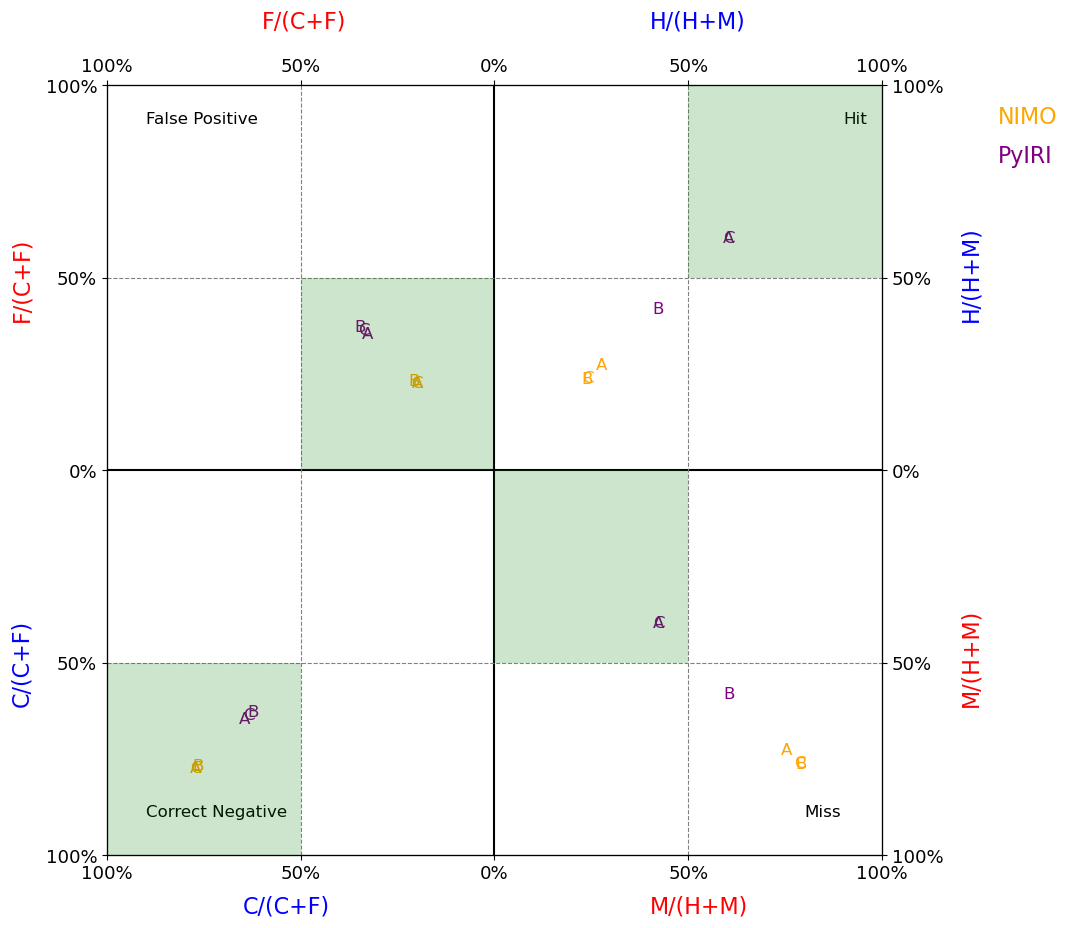

In [10]:
fig = HMFC_percent_figure(NiSw, PyI, 'eia', model1_name='NIMO', model2_name='PyIRI', col1='orange', col2='purple', fosi=16)